In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request
from collections import Counter

In [2]:
data = pd.read_csv("../Dataset/dataset.csv")

In [3]:
data.shape

(4920, 18)

In [4]:
data.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [10]:
Symptoms_columns = data[data.columns[1:]].columns

In [11]:
Symptoms_columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'],
      dtype='object')

#### Let's get all symptoms and save it into one array

In [16]:
symptoms = []
for col in Symptoms_columns :
    symptoms = symptoms + list(data[Symptoms_columns[0]].values)

In [18]:
symptoms[:5]

['itching', ' skin_rash', 'itching', 'itching', 'itching']

In [22]:
counter = Counter(symptoms)

In [23]:
counter

Counter({'itching': 11526,
         ' skin_rash': 8160,
         ' continuous_sneezing': 3774,
         ' shivering': 204,
         ' stomach_pain': 1938,
         ' acidity': 2040,
         ' vomiting': 13974,
         ' indigestion': 204,
         ' muscle_wasting': 1836,
         ' patches_in_throat': 204,
         ' fatigue': 11730,
         ' weight_loss': 102,
         ' sunken_eyes': 204,
         ' cough': 204,
         ' headache': 2142,
         ' chest_pain': 204,
         ' back_pain': 1836,
         ' weakness_in_limbs': 204,
         ' chills': 8058,
         ' joint_pain': 7854,
         ' yellowish_skin': 204,
         ' constipation': 1938,
         ' pain_during_bowel_movements': 102,
         ' breathlessness': 204,
         ' cramps': 102,
         ' weight_gain': 204,
         ' mood_swings': 102,
         ' neck_pain': 102,
         ' muscle_weakness': 1938,
         ' stiff_neck': 102,
         ' pus_filled_pimples': 102,
         ' burning_micturition': 1836,
  

In [24]:
results = pd.Series(dict(counter))

In [27]:
results.head()

itching                 11526
 skin_rash               8160
 continuous_sneezing     3774
 shivering                204
 stomach_pain            1938
dtype: int64

<AxesSubplot:>

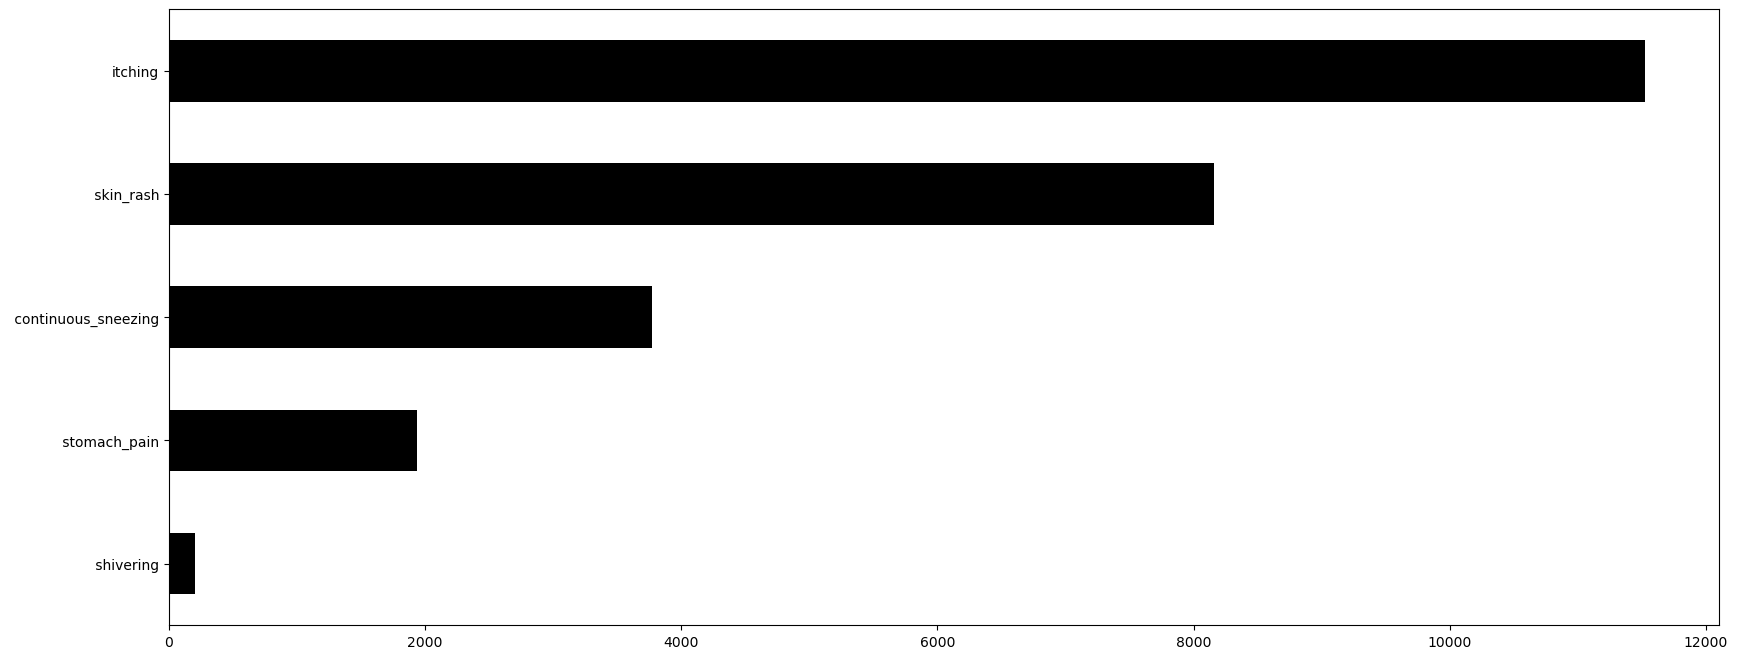

In [32]:
results.head().sort_values(ascending=True).plot(kind='barh', color='black',figsize=(20,8))